In [133]:
import tensorflow as tf

In [134]:
AUTOTUNE = tf.data.experimental.AUTOTUNE #自動調整CPU數量，讓TensorFlow自行決定如何使用CPU的核心

In [135]:
import pathlib #pathlib套件類似os套件，好像更強大？需要再去看看套件裡面有什麼函式能用
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
                                         #從網址取得壓縮檔 (網址, 檔名, 解壓縮)
data_root = pathlib.Path(data_root_orig) #載入解壓縮後檔案
print(data_root)

/root/.keras/datasets/flower_photos


In [136]:
for item in data_root.iterdir(): #得到目錄中所有路徑
  print(item)

/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/LICENSE.txt


In [137]:
import random
all_image_paths = list(data_root.glob('*/*')) #path.glob讀取路徑下所有資料夾或檔案
#print(all_image_paths[0])
all_image_paths = [str(path) for path in all_image_paths] #將圖片路徑轉成字串
#print(all_image_paths[0])
random.shuffle(all_image_paths) #random.shuffle打亂排序

image_count = len(all_image_paths)
image_count

3670

In [138]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
#以utf-8形式開啟LICENSE.txt，且只讀地4行後（看檔案就知道為什麼了）
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [139]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])


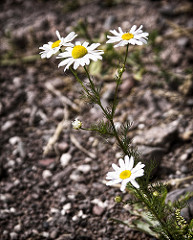

Image (CC BY 2.0)  by Randen Pederson



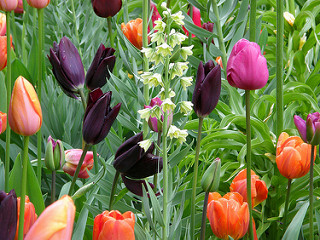

Image (CC BY 2.0)  by Manu



In [140]:
#檢查圖片，來看看自己在處理什麼
for n in range(2):
  image_path = random.choice(all_image_paths) #隨機取一個圖的路徑
  display.display(display.Image(image_path)) #顯示圖片(模組.顯示(顯示路徑(圖路徑)))
  print(caption_image(image_path))
  print()

In [141]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
#排序並印出資料夾名稱
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [142]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
#給每個資料夾上編號
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [143]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] #parent.name獲取路徑父目錄
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10]) #顯示10個來看看

First 10 labels indices:  [2, 3, 1, 2, 1, 1, 3, 1, 3, 0]


In [144]:
img_path = all_image_paths[0]
img_path

'/root/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'

In [145]:
img_raw = tf.io.read_file(img_path) #原始數據
print(repr(img_raw)[:100]+"...")
#str()'可讀性'較高，是給開發者閱讀對象中的'有用資訊'的字串，
#而repr()的英文全名是representation，其產生的字串是給python的直譯器看的，
#這個字串會顯示'明確且較詳盡的資訊'

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00...


In [146]:
img_tensor = tf.image.decode_image(img_raw) #將它解碼為圖像張量
#decode_image檢測是否為圖檔類型，並將輸入的string轉換為類型uint8
print(img_tensor.shape)
print(img_tensor.dtype)

(241, 320, 3)
<dtype: 'uint8'>


In [147]:
#根據模型調整其大小
img_final = tf.image.resize(img_tensor, [192,192]) 
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


In [148]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [149]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

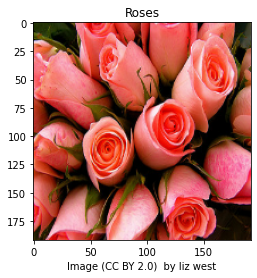

In [150]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()